In [1]:
# !pip install miditime

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt
import seaborn as sns
from miditime.miditime import MIDITime


# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [3]:


data = pd.read_csv('c:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/Call_Center_Final/Call_Center_Final/Call_log.csv')

#weights are based on table 4 in https://www.mdpi.com/2076-3417/12/21/10951
emotions = ["anger","sadness","happiness","fear","neutral"]
random.seed(42)
new_column=random.choices(emotions, weights=(177,30,38,30,312), k=len(data))

#add column
data['Emotion']=new_column

In [4]:
# data.to_csv('c:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/Call_Center_Final/Call_Center_Final/Call_log_with_Emotions.csv', index=False)

In [5]:
user_exp = pd.read_csv('c:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/Call_Center_Final/Call_Center_Final/User_experience.csv')
user_exp

Agent_ID            Call_Date User_Experience
0       32430  2017-01-25 00:00:00       very good
1       26020  2017-01-26 00:00:00       very good
2       26010  2017-01-27 00:00:00       very good
3       26020  2017-01-27 00:00:00       very good
4       32040  2017-01-27 00:00:00       very good
..        ...                  ...             ...
495     32350  2017-12-09 00:00:00       very good
496     32410  2017-12-09 00:00:00       very good
497     32380  2017-12-10 00:00:00       excellent
498     32430  2017-12-10 00:00:00       very good
499     14210  2017-12-11 00:00:00       very good

[500 rows x 3 columns]

In [6]:
merged_df = data.merge(user_exp, on=['Agent_ID', 'Call_Date'], how='right')

In [7]:
merged_df

Agent_ID            Call_Date  Talk_Time  After_Call_Work_Time  \
0        32430  2017-01-25 00:00:00       1990                   629   
1        32430  2017-01-25 00:00:00       2586                   530   
2        32430  2017-01-25 00:00:00       1388                   264   
3        32430  2017-01-25 00:00:00       1024                   272   
4        32430  2017-01-25 00:00:00       1496                   306   
...        ...                  ...        ...                   ...   
9245     14210  2017-12-11 00:00:00       2816                   661   
9246     14210  2017-12-11 00:00:00        846                   329   
9247     14210  2017-12-11 00:00:00        451                   106   
9248     14210  2017-12-11 00:00:00       2239                   458   
9249     14210  2017-12-11 00:00:00       2429                   726   

      Queue_Time Call_resolution_ID Call_Type_ID Plan_ID  Emotion  \
0             18        Resolution1       Type20   Plan3  neutral   
1             12        Resolution1       Type40   Plan1    anger   
2              7        Resolution1       Type40   Plan6  sadness   
3             13        Resolution2       Type10   Plan5  neutral   
4              9        Resolution1       Type30   Plan6    anger   
...          ...                ...          ...     ...      ...   
9245          13        Resolution1       Type40   Plan2     fear   
9246          13        Resolution1       Type50   Plan4  neutral   
9247          10        Resolution1       Type40   Plan5    anger   
9248          14        Resolution1       Type40   Plan4    anger   
9249          11        Resolution1       Type40   Plan2  neutral   

     User_Experience  
0          very good  
1          very good  
2          very good  
3          very good  
4          very good  
...              ...  
9245       very good  
9246       very good  
9247       very good  
9248       very good  
9249       very good  

[9250 rows x 10 columns]

Select the data with anger emotion

In [16]:
anger_data = data[data['Emotion'] == 'anger']

Select a specific Agent

In [17]:
data_agent = anger_data[anger_data['Agent_ID'] == 32430]

### AHT (Average Handle Time) metrics

Average Talk Time across the whole data, this could show us what could be the threshold

In [23]:
data['Talk_Time'].mean()

849.2729860070932

Every day in a month

In [18]:
specific_month = '2017-01'  # Change this to your desired month

In [19]:
# Assuming your data is stored in a DataFrame called data_agent
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
data_agent = data_agent.copy()

# Convert 'Call_Date' to a datetime object
data_agent['Call_Date'] = pd.to_datetime(data_agent['Call_Date'])

# Extract the month and year from 'Call_Date'
data_agent['Month'] = data_agent['Call_Date'].dt.strftime('%Y-%m')

# Convert 'Talk_Time' to numeric in case it's not already
data_agent['Talk_Time'] = pd.to_numeric(data_agent['Talk_Time'])

# Filter the DataFrame for a specific month (e.g., January)

filtered_data = data_agent[data_agent['Month'] == specific_month]

# Group by 'Call_Date' (day) and calculate the average talk time for each day
average_talk_time_by_day = filtered_data.groupby('Call_Date')['Talk_Time'].mean()

# Reset the index to have 'Call_Date' as a regular column
average_talk_time_by_day = average_talk_time_by_day.reset_index()

# Display the result
average_talk_time_by_day

Call_Date    Talk_Time
0  2017-01-01  2030.000000
1  2017-01-02  1099.750000
2  2017-01-03  1273.000000
3  2017-01-04   795.333333
4  2017-01-07  1339.000000
5  2017-01-08   954.375000
6  2017-01-09   706.250000
7  2017-01-10  1599.000000
8  2017-01-11  1899.000000
9  2017-01-14  1120.800000
10 2017-01-15  1019.857143
11 2017-01-16  1033.250000
12 2017-01-17   904.625000
13 2017-01-18  2270.750000
14 2017-01-21   868.166667
15 2017-01-22   558.000000
16 2017-01-23   815.666667
17 2017-01-24  1308.000000
18 2017-01-25  1970.250000
19 2017-01-28  1557.750000
20 2017-01-29  1631.000000
21 2017-01-30  1124.400000
22 2017-01-31  1298.666667

Every Week

In [20]:
# Assuming your data is stored in a DataFrame called data_agent
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
data_agent = data_agent.copy()

# Convert 'Call_Date' to a datetime object
data_agent['Call_Date'] = pd.to_datetime(data_agent['Call_Date'])

# Extract the week of the year and create a new column 'Week'
data_agent['Week'] = data_agent['Call_Date'].dt.strftime('%U')

# Convert 'Talk_Time' to numeric in case it's not already
data_agent['Talk_Time'] = pd.to_numeric(data_agent['Talk_Time'])

# Group by 'Week' and calculate the average talk time for each week
average_talk_time_by_week = data_agent.groupby('Week')['Talk_Time'].mean()

# Reset the index to have 'Week' as a regular column
average_talk_time_by_week = average_talk_time_by_week.reset_index()

# Display the result
average_talk_time_by_week

Week    Talk_Time
0    00  1237.583333
1    01  1176.755102
2    02  1137.071429
3    03  1235.647887
4    04  1262.563636
5    05  1259.150000
6    06  1114.827586
7    07  1242.013699
8    08   864.727273
9    09  1061.634921
10   10  1097.318841
11   11   945.418182
12   12  1076.967742
13   13  1187.609375
14   14  1046.020833
15   15  1149.584615
16   16   994.063492
17   17  1059.454545
18   18  1178.604167
19   19  1054.943662
20   20  1147.507463
21   21  1077.550000
22   22  1205.875000
23   23  1147.037037
24   24  1073.125000
25   25  1140.622222
26   26  1153.750000
27   27  1109.755556
28   28  1129.483871
29   29   889.175000
30   30   885.032258
31   31  1097.647059
32   32  1098.885714
33   33  1176.121951
34   34  1017.285714
35   35  1172.064516
36   36  1233.489362
37   37  1151.589744
38   38  1056.380952
39   39  1197.045455
40   40  1051.644444
41   41   978.382353
42   42  1103.177778
43   43   989.586957
44   44  1055.166667
45   45  1145.516129
46   46   961.836735
47   47  1141.976190
48   48  1169.114286
49   49   958.068182
50   50  1129.923077
51   51  1087.375000
52   52  1074.545455
53   53  2450.333333

### FCR (First Call Resolution) Metric

Average of Resolution1 across the whole data, this could show us what could be the threshold

In [25]:
(data['Call_resolution_ID'] == 'Resolution1').mean()

0.7504057317614268

Every day in a month

In [21]:
target_year = 2017  # Replace with the year you want
target_month = 1    # Replace with the month you want

In [22]:
# Assuming your data is stored in a DataFrame called data_agent
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
data_agent = data_agent.copy()

# Convert 'Call_Date' to a datetime object
data_agent['Call_Date'] = pd.to_datetime(data_agent['Call_Date'])

# Extract the year and month from 'Call_Date'
data_agent['Year'] = data_agent['Call_Date'].dt.year
data_agent['Month'] = data_agent['Call_Date'].dt.month

filtered_data = data_agent[(data_agent['Year'] == target_year) & (data_agent['Month'] == target_month)]

# Calculate the total number of calls for each day in the specific month
total_calls_by_day = filtered_data.groupby(filtered_data['Call_Date'].dt.day)['Agent_ID'].count().reset_index()
total_calls_by_day.columns = ['Day', 'Total Calls']

# Calculate the number of calls with 'Resolution1' for each day in the specific month
resolution1_calls_by_day = filtered_data[filtered_data['Call_resolution_ID'] == 'Resolution1'].groupby(
    filtered_data['Call_Date'].dt.day)['Agent_ID'].count().reset_index()
resolution1_calls_by_day.columns = ['Day', 'Resolution1 Calls']

# Merge the two DataFrames on 'Day'
merged_data = pd.merge(total_calls_by_day, resolution1_calls_by_day, on='Day', how='left')

# Fill NaN values with 0 (in case there are days with no 'Resolution1' calls)
merged_data['Resolution1 Calls'] = merged_data['Resolution1 Calls'].fillna(0)

# Calculate the percentage of 'Resolution1' calls for each day in the specific month
merged_data['Resolution1 Percentage'] = (merged_data['Resolution1 Calls'] / merged_data['Total Calls']) * 100

# Display the result
merged_data

Day  Total Calls  Resolution1 Calls  Resolution1 Percentage
0     1            1                  1              100.000000
1     2            4                  3               75.000000
2     3            5                  3               60.000000
3     4            3                  3              100.000000
4     7            1                  1              100.000000
5     8            8                  7               87.500000
6     9            4                  3               75.000000
7    10            4                  2               50.000000
8    11            2                  1               50.000000
9    14            5                  5              100.000000
10   15            7                  6               85.714286
11   16            8                  8              100.000000
12   17            8                  7               87.500000
13   18            4                  3               75.000000
14   21            6                  6              100.000000
15   22            1                  1              100.000000
16   23            3                  2               66.666667
17   24            6                  6              100.000000
18   25            4                  4              100.000000
19   28            4                  2               50.000000
20   29            1                  1              100.000000
21   30            5                  5              100.000000
22   31            6                  5               83.333333

Every Week

In [10]:
# Assuming your data is stored in a DataFrame called data_agent
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
data_agent = data_agent.copy()

# Convert 'Call_Date' to a datetime object
data_agent['Call_Date'] = pd.to_datetime(data_agent['Call_Date'])

# Extract the week of the year and create a new column 'Week'
data_agent['Week'] = data_agent['Call_Date'].dt.strftime('%U')

# Calculate the total number of calls for each week
total_calls_by_week = data_agent.groupby('Week').size().reset_index(name='Total Calls')

# Calculate the number of calls with 'Resolution1' for each week
resolution1_calls_by_week = data_agent[data_agent['Call_resolution_ID'] == 'Resolution1'].groupby('Week').size().reset_index(name='Resolution1 Calls')

# Merge the two DataFrames on 'Week'
merged_data = pd.merge(total_calls_by_week, resolution1_calls_by_week, on='Week', how='left')

# Fill NaN values with 0 (in case there are weeks with no 'Resolution1' calls)
merged_data['Resolution1 Calls'] = merged_data['Resolution1 Calls'].fillna(0)

# Calculate the percentage of 'Resolution1' calls for each week
merged_data['Resolution1 Percentage'] = (merged_data['Resolution1 Calls'] / merged_data['Total Calls']) * 100

# Display the result
merged_data

Week  Total Calls  Resolution1 Calls  Resolution1 Percentage
0    00          205                176               85.853659
1    01          347                288               82.997118
2    02          331                279               84.290030
3    03          353                287               81.303116
4    04          369                307               83.197832
5    05          334                286               85.628743
6    06          357                283               79.271709
7    07          347                297               85.590778
8    08          353                288               81.586402
9    09          383                312               81.462141
10   10          341                280               82.111437
11   11          372                314               84.408602
12   12          303                263               86.798680
13   13          348                299               85.919540
14   14          345                275               79.710145
15   15          349                280               80.229226
16   16          360                290               80.555556
17   17          404                319               78.960396
18   18          339                271               79.941003
19   19          371                307               82.749326
20   20          374                314               83.957219
21   21          341                271               79.472141
22   22          344                296               86.046512
23   23          341                277               81.231672
24   24          345                290               84.057971
25   25          307                263               85.667752
26   26          226                189               83.628319
27   27          243                216               88.888889
28   28          235                196               83.404255
29   29          249                214               85.943775
30   30          245                198               80.816327
31   31          230                192               83.478261
32   32          227                177               77.973568
33   33          206                174               84.466019
34   34          237                199               83.966245
35   35          238                182               76.470588
36   36          251                216               86.055777
37   37          231                190               82.251082
38   38          237                187               78.902954
39   39          240                209               87.083333
40   40          217                173               79.723502
41   41          240                187               77.916667
42   42          240                196               81.666667
43   43          215                172               80.000000
44   44          234                184               78.632479
45   45          224                186               83.035714
46   46          224                186               83.035714
47   47          218                181               83.027523
48   48          212                184               86.792453
49   49          229                186               81.222707
50   50          255                205               80.392157
51   51          223                181               81.165919
52   52          139                113               81.294964

## Data Visualization

For the entire Dataset

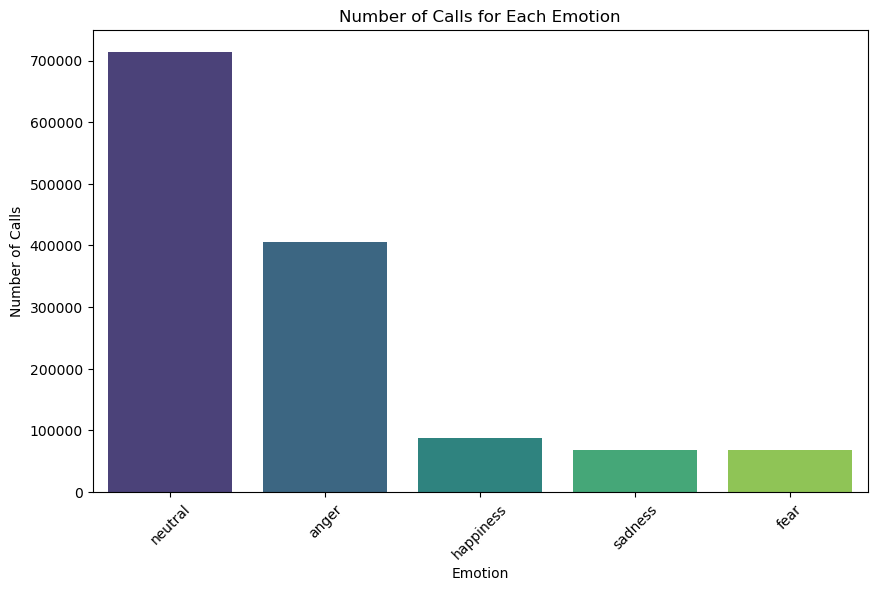

In [8]:
emotion_counts = data['Emotion'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')
plt.xlabel('Emotion')
plt.ylabel('Number of Calls')
plt.title('Number of Calls for Each Emotion')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Calls that were rated

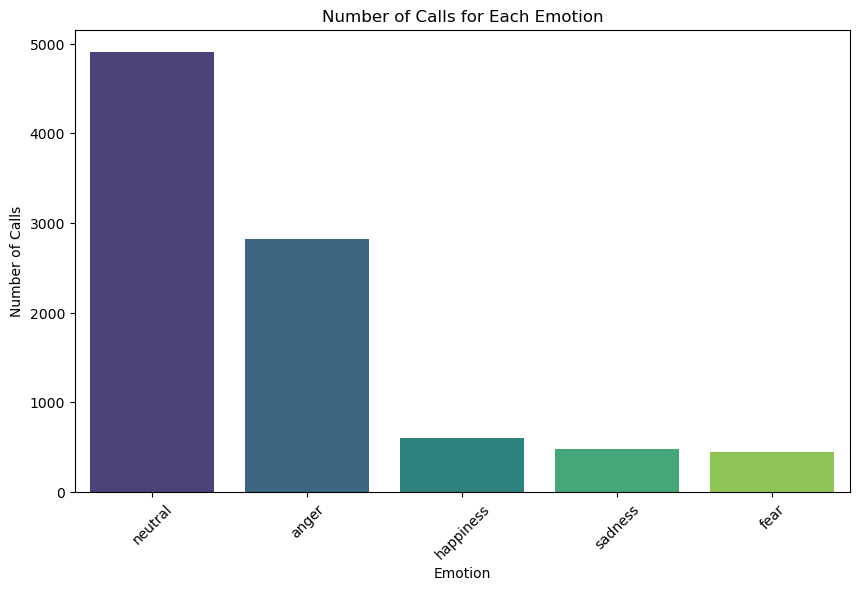

In [9]:
emotion_counts = merged_df['Emotion'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')
plt.xlabel('Emotion')
plt.ylabel('Number of Calls')
plt.title('Number of Calls for Each Emotion')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Including the User Experience

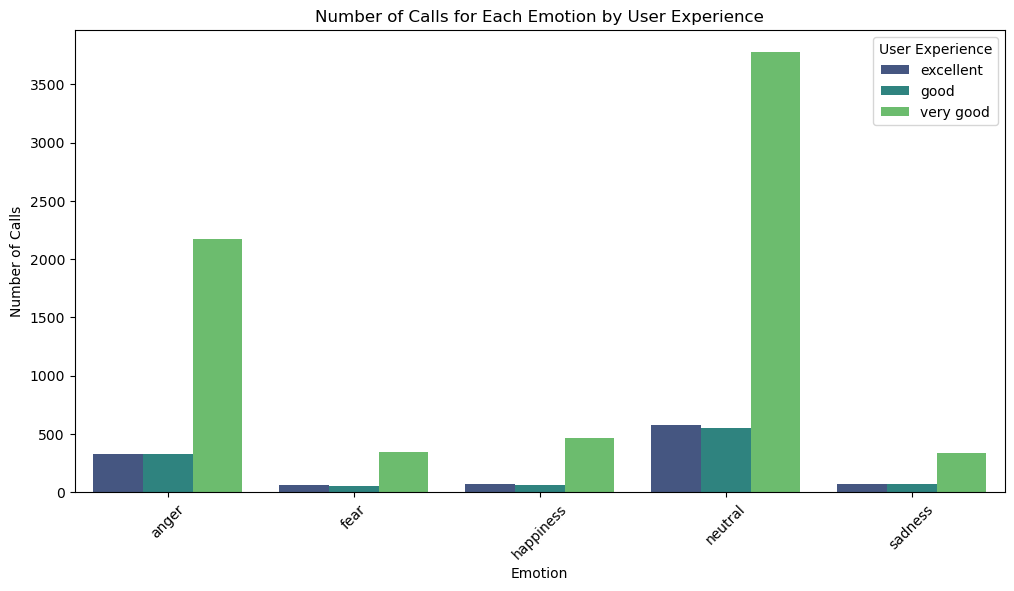

In [10]:
emotion_user_counts =merged_df.groupby(['Emotion', 'User_Experience']).size().reset_index(name='Count')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Emotion', y='Count', hue='User_Experience', data=emotion_user_counts, palette='viridis')
plt.xlabel('Emotion')
plt.ylabel('Number of Calls')
plt.title('Number of Calls for Each Emotion by User Experience')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='User Experience')
plt.show()

Talk Time with Emotion Over Time on the User Exp dataset

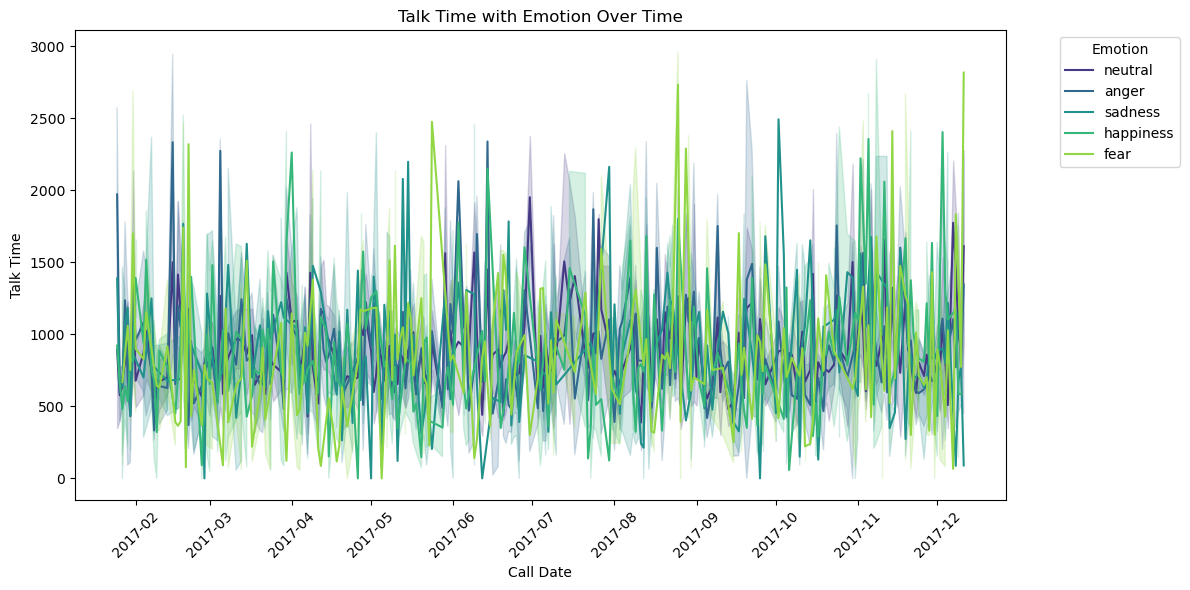

In [11]:
merged_df['Call_Date'] = pd.to_datetime(merged_df['Call_Date'])

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Call_Date', y='Talk_Time', hue='Emotion', palette='viridis')
plt.xlabel('Call Date')
plt.ylabel('Talk Time')
plt.title('Talk Time with Emotion Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In different graphs

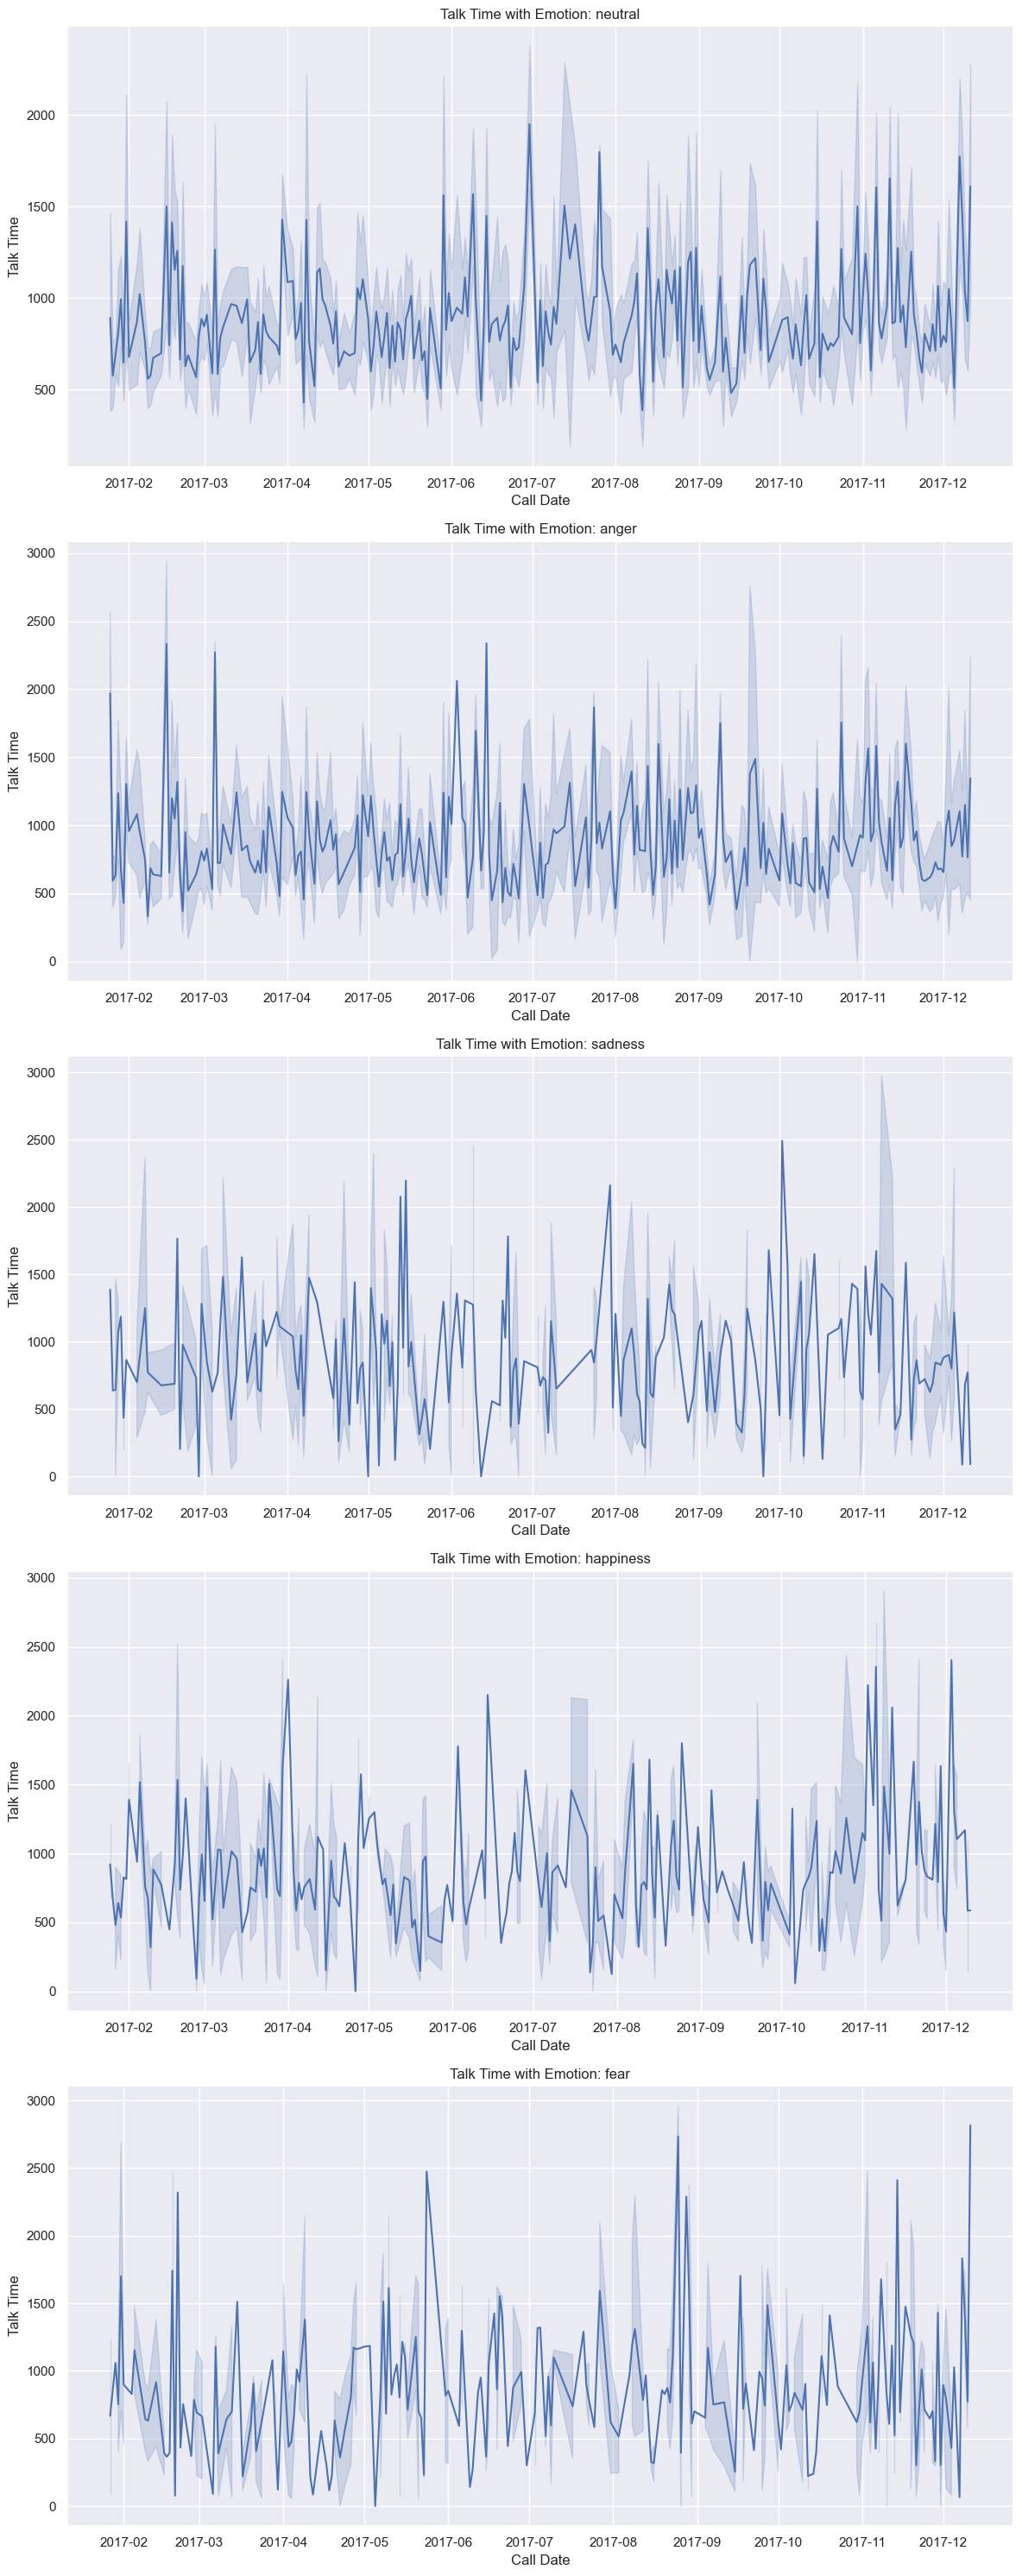

In [27]:
# Get unique emotions in the DataFrame
unique_emotions = merged_df['Emotion'].unique()

# Create subplots for each emotion
fig, axes = plt.subplots(nrows=len(unique_emotions), figsize=(12, 6 * len(unique_emotions)))

# Loop through each emotion and create a separate subplot
for i, emotion in enumerate(unique_emotions):
    ax = axes[i]
    
    # Filter the DataFrame for the current emotion
    subset_df = merged_df[merged_df['Emotion'] == emotion]
    
    # Create a line plot for 'Talk_Time' with the current emotion
    sns.lineplot(data=subset_df, x='Call_Date', y='Talk_Time', ax=ax)
    
    # Set the title and labels for the subplot
    ax.set_title(f'Talk Time with Emotion: {emotion}')
    ax.set_xlabel('Call Date')
    ax.set_ylabel('Talk Time')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Different approach this will use the all dataset but for each Agent

In [23]:
data[data['Agent_ID'] == 14000]

Agent_ID            Call_Date  Talk_Time  After_Call_Work_Time  \
1156        14000  2017-01-02 00:00:00       1100                   210   
1195        14000  2017-01-02 00:00:00        215                    92   
1365        14000  2017-01-02 00:00:00        374                   153   
1380        14000  2017-01-02 00:00:00         62                    14   
1421        14000  2017-01-02 00:00:00        859                   152   
...           ...                  ...        ...                   ...   
1341087     14000  2019-06-28 00:00:00        113                    44   
1341124     14000  2019-06-28 00:00:00       1362                   340   
1341156     14000  2019-06-28 00:00:00        759                   253   
1341169     14000  2019-06-28 00:00:00        546                   104   
1341170     14000  2019-06-28 00:00:00       1196                   337   

         Queue_Time Call_resolution_ID Call_Type_ID Plan_ID    Emotion  
1156             32        Resolution2       Type40   Plan6       fear  
1195             15        Resolution3       Type50   Plan5    neutral  
1365             33        Resolution1       Type30   Plan4      anger  
1380             20        Resolution3       Type20   Plan6    neutral  
1421             17        Resolution1       Type20   Plan3    neutral  
...             ...                ...          ...     ...        ...  
1341087          20        Resolution1       Type10   Plan3      anger  
1341124          14        Resolution1       Type50   Plan4    neutral  
1341156          20        Resolution1       Type10   Plan4    neutral  
1341169          20        Resolution1       Type50   Plan1    neutral  
1341170          20        Resolution1       Type40   Plan3  happiness  

[15128 rows x 9 columns]

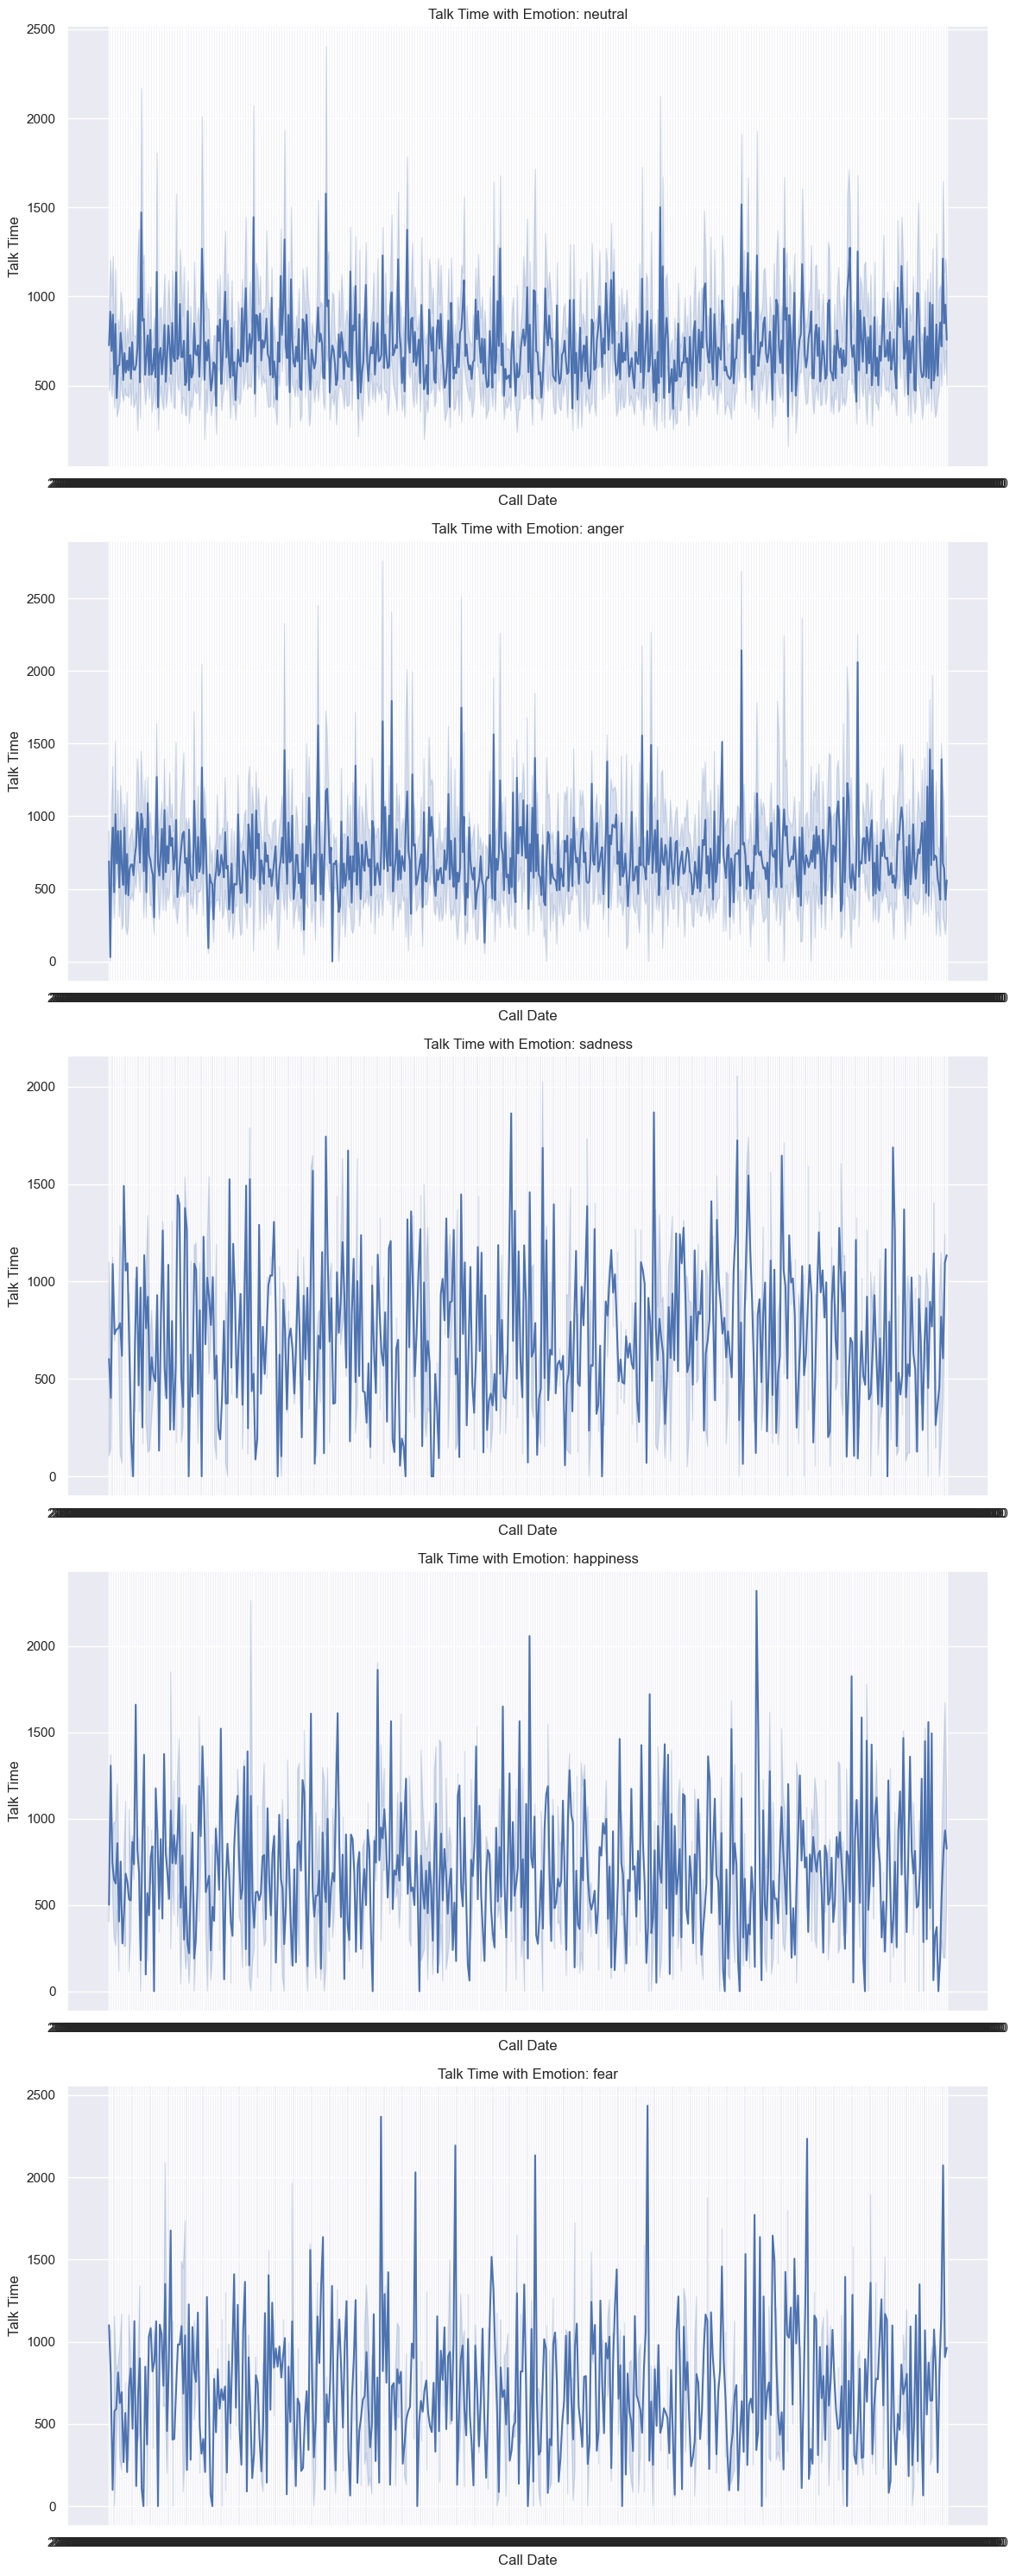

In [26]:
# Get unique emotions in the DataFrame
unique_emotions = merged_df['Emotion'].unique()
agent_df=data[data['Agent_ID'] == 14000]

# Create subplots for each emotion
fig, axes = plt.subplots(nrows=len(unique_emotions), figsize=(12, 6 * len(unique_emotions)))

# Loop through each emotion and create a separate subplot
for i, emotion in enumerate(unique_emotions):
    ax = axes[i]
    
    # Filter the DataFrame for the current emotion
    subset_df = agent_df[agent_df['Emotion'] == emotion]
    
    # Create a line plot for 'Talk_Time' with the current emotion
    sns.lineplot(data=subset_df, x='Call_Date', y='Talk_Time', ax=ax)
    
    # Set the title and labels for the subplot
    ax.set_title(f'Talk Time with Emotion: {emotion}')
    ax.set_xlabel('Call Date')
    ax.set_ylabel('Talk Time')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Lets use the quantity of calls against the emotions for each agent

C:\Users\gusta\AppData\Local\Temp\ipykernel_9540\2391235991.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Call_Date'] = pd.to_datetime(filtered_df['Call_Date'])
C:\Users\gusta\AppData\Local\Temp\ipykernel_9540\2391235991.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  grouped = filtered_df.groupby([filtered_df['Call_Date'].dt.week, 'Emotion']).size().unstack(fill_value=0)


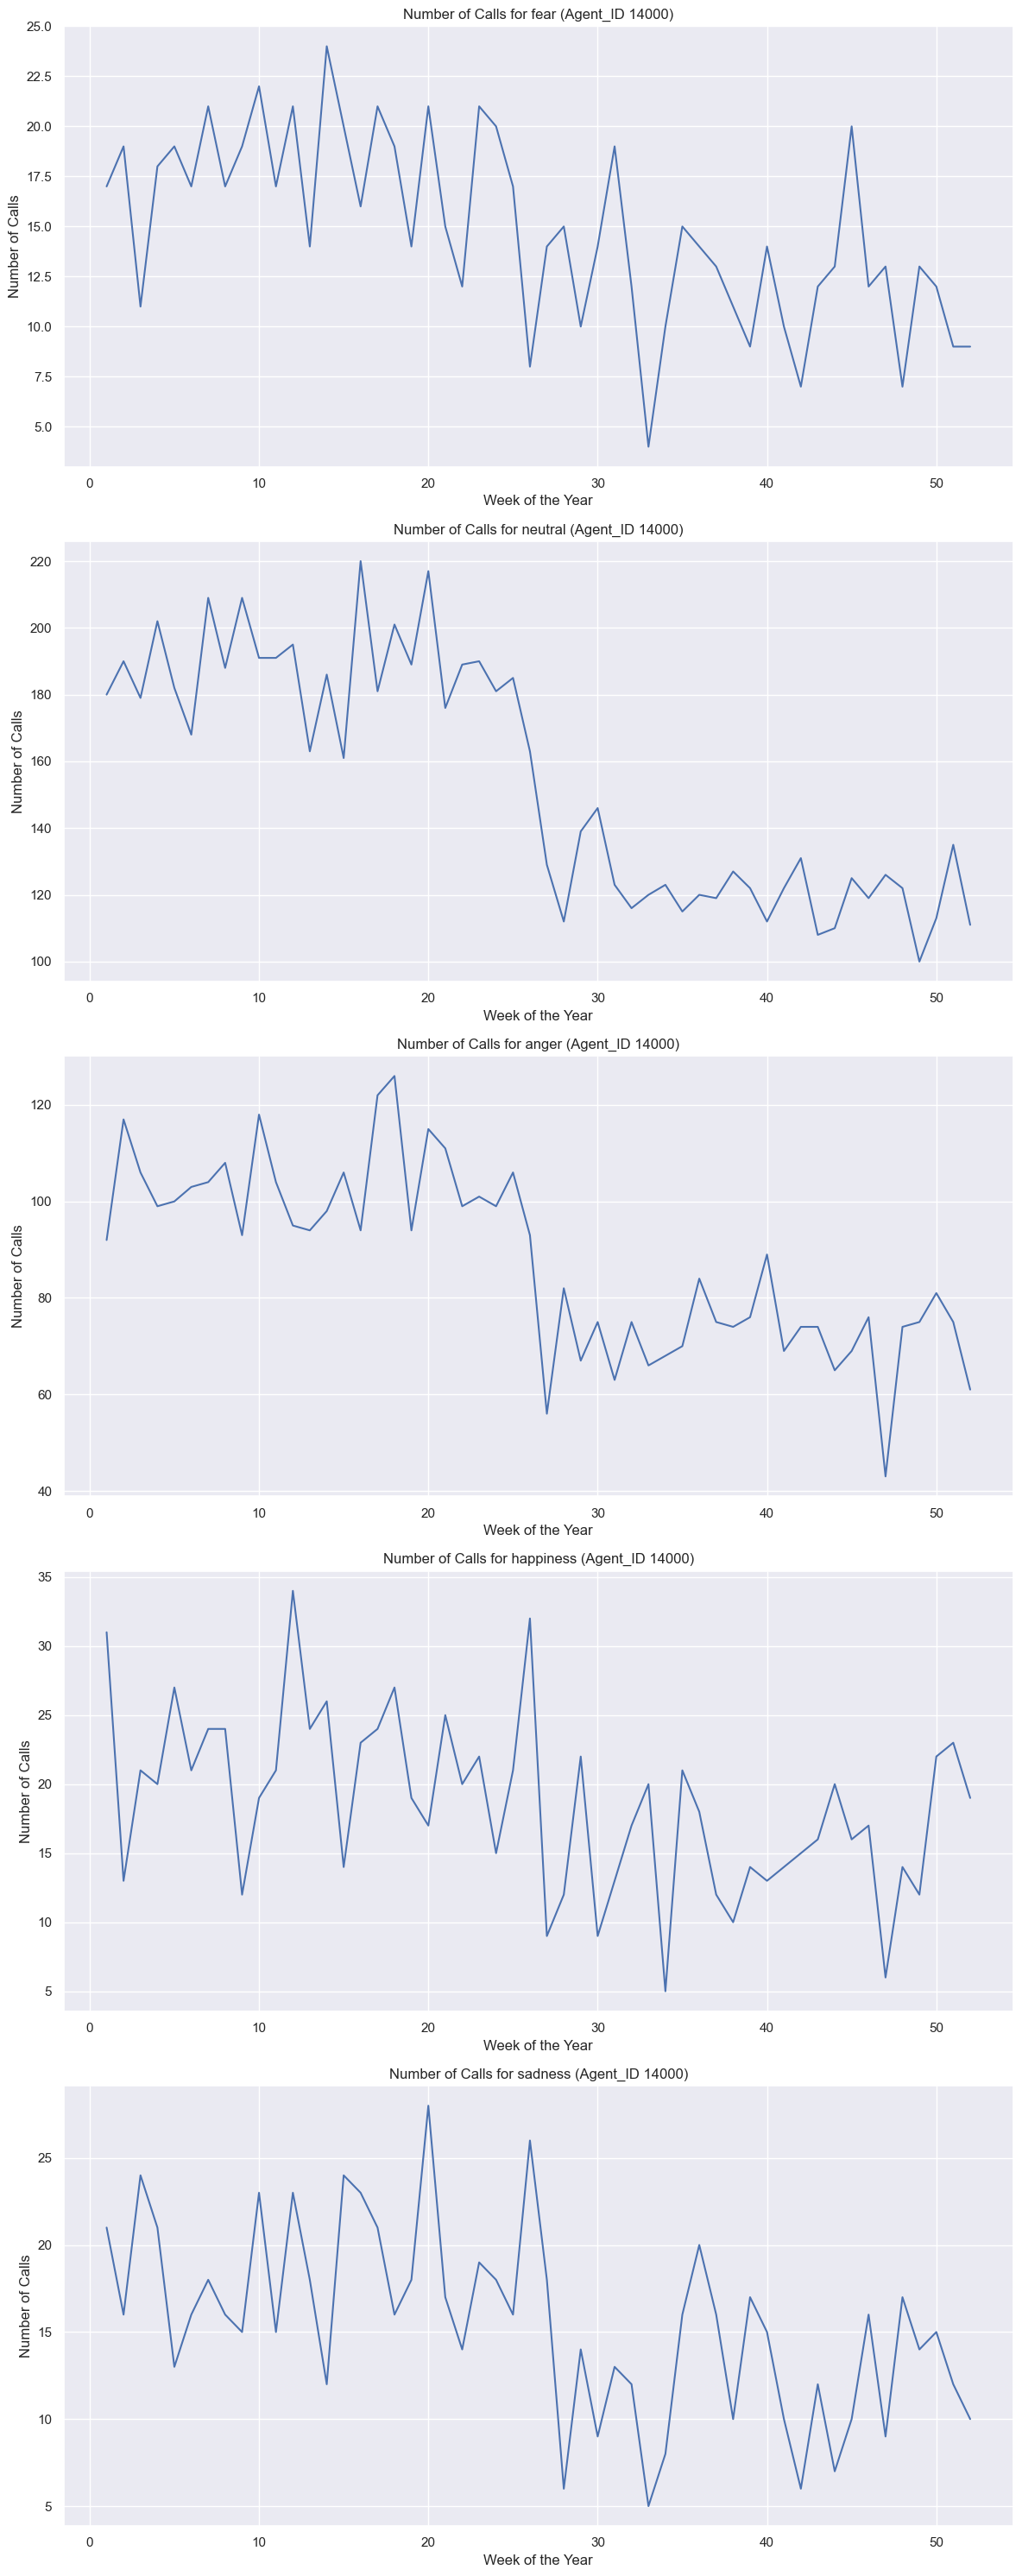

In [29]:
# Specify the agent ID you want to analyze
agent_id = 14000

# Filter the DataFrame for the specific agent
filtered_df = data[data['Agent_ID'] == agent_id]

# Convert the 'Call_Date' column to a datetime object
filtered_df['Call_Date'] = pd.to_datetime(filtered_df['Call_Date'])

# Group the data by emotion and week, counting the number of calls in each group
grouped = filtered_df.groupby([filtered_df['Call_Date'].dt.week, 'Emotion']).size().unstack(fill_value=0)

# Get unique emotions for this agent
unique_emotions = filtered_df['Emotion'].unique()

# Create a separate line chart for each emotion
fig, axes = plt.subplots(nrows=len(unique_emotions), figsize=(12, 6 * len(unique_emotions)))

# Loop through each emotion and create a line chart
for i, emotion in enumerate(unique_emotions):
    ax = axes[i]
    
    # Filter the data for the current emotion
    subset_df = grouped[emotion].reset_index()
    
    # Create a line chart for this emotion
    sns.lineplot(data=subset_df, x='Call_Date', y=emotion, ax=ax)
    
    # Set labels and title for the subplot
    ax.set_xlabel('Week of the Year')
    ax.set_ylabel('Number of Calls')
    ax.set_title(f'Number of Calls for {emotion} (Agent_ID {agent_id})')

# Adjust spacing between subplots
plt.tight_layout()

# Show the line charts
plt.show()

# Data Sonification

## Example

In [ ]:
data=pd.read_csv('c:/Users/gusta/Downloads/archive/raw_sales.csv',parse_dates=['datesold'])
data.size

In [ ]:
data

In [ ]:
my_data = data[['datesold','price']].to_dict(orient='records')

In [ ]:
my_data

In [ ]:
my_data_epoched = [{'days_since_epoch': mymidi.days_since_epoch(d['datesold']), 'price': (d['price'])} for d in my_data]

In [ ]:
my_data_epoched

In [ ]:
my_data_timed = [{'beat': mymidi.beat(d['days_since_epoch']), 'price': d['price']} for d in my_data_epoched]

In [ ]:
my_data_timed

In [ ]:
start_time = my_data_timed[0]['beat']

In [ ]:
def mag_to_pitch_tuned(magnitude):
    """Where does this data point sit in the domain of your data? 
    (I.E. the min magnitude is 3, the max in 5.6). 
    In this case the optional 'True' means the scale is reversed, 
    so the highest value will return the lowest percentage."""

#     scale_pct = mymidi.linear_scale_pct(3, 5.7, magnitude)

    # Another option: Linear scale, reverse order
    scale_pct = mymidi.linear_scale_pct(400000,8100000 , magnitude)

    # Another option: Logarithmic scale, reverse order
#     scale_pct = mymidi.log_scale_pct(3, 5.7, magnitude, True)

    # Pick a range of notes. This allows you to play in a key.
    c_major = ['C', 'D', 'E', 'F', 'G', 'A', 'B']
    c_minor = ['C', 'D', 'D#', 'F', 'G', 'G#', 'A#']

    #Find the note that matches your data point
    note = mymidi.scale_to_note(scale_pct, c_major)

    #Translate that note to a MIDI pitch
    midi_pitch = mymidi.note_to_midi_pitch(note)

    return midi_pitch

In [ ]:
note_list = []

for d in my_data_timed:
    note_list.append([
        d['beat'] - start_time,
        mag_to_pitch_tuned(d['price']),
        100,  # velocity
        1  # duration, in beats
    ])

In [ ]:
note_list

In [ ]:
# Add a track with those notes
mymidi.add_track(note_list)

# Output the .mid file
mymidi.save_midi()

## First Approach

In [ ]:
merged_df.head()

In [6]:
emotion_lists = {
    'neutral': [60, 55, 60, 67, 72, 67, 60, 55],
    'happiness': [60, 64, 67, 72, 72, 67, 64, 60],
    'sadness': [60, 63, 67, 72, 72, 67, 63, 60],
    'fear': [60, 63, 66, 72, 72, 66, 63, 60],
    'anger':  [60, 64, 68, 72, 72, 68, 64, 60] 
}

In [7]:
def generate_emotion_list(row):
    emotion = row['Emotion']
    talk_time = int(row['Talk_Time'] / 100)
    emotion_list = emotion_lists.get(emotion, [])
    return [emotion_list[i % len(emotion_list)] for i in range(talk_time)]

In [8]:
merged_df['Emotion_List'] = merged_df.apply(generate_emotion_list, axis=1)

In [9]:
merged_df['Emotion_List']

0       [60, 55, 60, 67, 72, 67, 60, 55, 60, 55, 60, 6...
1       [60, 64, 68, 72, 72, 68, 64, 60, 60, 64, 68, 7...
2       [60, 63, 67, 72, 72, 67, 63, 60, 60, 63, 67, 7...
3                [60, 55, 60, 67, 72, 67, 60, 55, 60, 55]
4       [60, 64, 68, 72, 72, 68, 64, 60, 60, 64, 68, 7...
                              ...                        
9245    [60, 63, 66, 72, 72, 66, 63, 60, 60, 63, 66, 7...
9246                     [60, 55, 60, 67, 72, 67, 60, 55]
9247                                     [60, 64, 68, 72]
9248    [60, 64, 68, 72, 72, 68, 64, 60, 60, 64, 68, 7...
9249    [60, 55, 60, 67, 72, 67, 60, 55, 60, 55, 60, 6...
Name: Emotion_List, Length: 9250, dtype: object

In [10]:
all_emotion_values = merged_df['Emotion_List'].explode().tolist()

In [11]:
all_emotion_values

[60,
 55,
 60,
 67,
 72,
 67,
 60,
 55,
 60,
 55,
 60,
 67,
 72,
 67,
 60,
 55,
 60,
 55,
 60,
 60,
 64,
 68,
 72,
 72,
 68,
 64,
 60,
 60,
 64,
 68,
 72,
 72,
 68,
 64,
 60,
 60,
 64,
 68,
 72,
 72,
 68,
 64,
 60,
 60,
 60,
 63,
 67,
 72,
 72,
 67,
 63,
 60,
 60,
 63,
 67,
 72,
 72,
 60,
 55,
 60,
 67,
 72,
 67,
 60,
 55,
 60,
 55,
 60,
 64,
 68,
 72,
 72,
 68,
 64,
 60,
 60,
 64,
 68,
 72,
 72,
 68,
 60,
 64,
 67,
 72,
 72,
 67,
 60,
 64,
 67,
 72,
 72,
 67,
 64,
 60,
 60,
 64,
 67,
 72,
 60,
 55,
 60,
 60,
 60,
 55,
 60,
 67,
 72,
 67,
 60,
 55,
 60,
 60,
 64,
 68,
 72,
 72,
 68,
 64,
 60,
 60,
 64,
 68,
 72,
 60,
 64,
 67,
 72,
 72,
 67,
 64,
 60,
 60,
 64,
 68,
 72,
 72,
 68,
 64,
 60,
 60,
 64,
 68,
 72,
 72,
 68,
 64,
 60,
 60,
 64,
 68,
 72,
 72,
 68,
 64,
 60,
 60,
 60,
 55,
 60,
 67,
 72,
 67,
 60,
 55,
 60,
 55,
 60,
 55,
 60,
 67,
 72,
 67,
 60,
 55,
 60,
 55,
 60,
 67,
 72,
 67,
 60,
 55,
 60,
 55,
 60,
 63,
 67,
 72,
 72,
 67,
 60,
 64,
 67,
 72,
 72,
 67,
 60,
 64,
 68,


In [12]:
import math

nan_indices = [i for i, x in enumerate(all_emotion_values) if math.isnan(x)]

# Using a loop
nan_indices = []
for i, x in enumerate(all_emotion_values):
    if math.isnan(x):
        nan_indices.append(i)

print("Indices of NaN values:", nan_indices)

Indices of NaN values: [256, 280, 296, 421, 447, 490, 601, 602, 712, 986, 1199, 1246, 1247, 1320, 1635, 1872, 1988, 1989, 2272, 2356, 2401, 2488, 2526, 2532, 2764, 2799, 2993, 3035, 3050, 3074, 3213, 3331, 3540, 3603, 3775, 3870, 4394, 4444, 4492, 4912, 4924, 5473, 5488, 5799, 5800, 5849, 5909, 6043, 6286, 6348, 6371, 6424, 6497, 6572, 6573, 6583, 6681, 6749, 6782, 7109, 7201, 7288, 7323, 7498, 7981, 8017, 8033, 8090, 8118, 8126, 8208, 8437, 8503, 8801, 8937, 8948, 8956, 9109, 9311, 9341, 9608, 9655, 9680, 9990, 10119, 10244, 10351, 10420, 10860, 10915, 10989, 11044, 11115, 11197, 11214, 11215, 11248, 11478, 11479, 11503, 11580, 11705, 11722, 11833, 11848, 11895, 11986, 12110, 12315, 12408, 12597, 12629, 12845, 12911, 12958, 13228, 13292, 13359, 13414, 13484, 14385, 14455, 14689, 14764, 14834, 14882, 14912, 14913, 14916, 15214, 15287, 15662, 15945, 16153, 16169, 16306, 16318, 16321, 16381, 16403, 17001, 17137, 17429, 17502, 17689, 18018, 18067, 18109, 18133, 18141, 18170, 18171, 18201,

In [13]:
cleaned_list = [x for x in all_emotion_values if not math.isnan(x)]

print("Cleaned list without NaN values:", cleaned_list)

Cleaned list without NaN values: [60, 55, 60, 67, 72, 67, 60, 55, 60, 55, 60, 67, 72, 67, 60, 55, 60, 55, 60, 60, 64, 68, 72, 72, 68, 64, 60, 60, 64, 68, 72, 72, 68, 64, 60, 60, 64, 68, 72, 72, 68, 64, 60, 60, 60, 63, 67, 72, 72, 67, 63, 60, 60, 63, 67, 72, 72, 60, 55, 60, 67, 72, 67, 60, 55, 60, 55, 60, 64, 68, 72, 72, 68, 64, 60, 60, 64, 68, 72, 72, 68, 60, 64, 67, 72, 72, 67, 60, 64, 67, 72, 72, 67, 64, 60, 60, 64, 67, 72, 60, 55, 60, 60, 60, 55, 60, 67, 72, 67, 60, 55, 60, 60, 64, 68, 72, 72, 68, 64, 60, 60, 64, 68, 72, 60, 64, 67, 72, 72, 67, 64, 60, 60, 64, 68, 72, 72, 68, 64, 60, 60, 64, 68, 72, 72, 68, 64, 60, 60, 64, 68, 72, 72, 68, 64, 60, 60, 60, 55, 60, 67, 72, 67, 60, 55, 60, 55, 60, 55, 60, 67, 72, 67, 60, 55, 60, 55, 60, 67, 72, 67, 60, 55, 60, 55, 60, 63, 67, 72, 72, 67, 60, 64, 67, 72, 72, 67, 60, 64, 68, 72, 72, 68, 60, 64, 68, 72, 72, 68, 64, 60, 60, 60, 55, 60, 67, 72, 67, 60, 55, 60, 55, 60, 60, 55, 60, 67, 72, 67, 60, 55, 60, 64, 68, 72, 72, 68, 64, 60, 60, 55, 60

In [14]:
custom_list = [[i/5, val, 127, 1] for i, val in enumerate(cleaned_list)]

In [15]:
len(custom_list)

72837

In [16]:
custom_list[0][0] = 0 

In [39]:
my_list = custom_list[:10000]

In [16]:
my_list

[[0, 60, 127, 1],
 [0.2, 55, 127, 1],
 [0.4, 60, 127, 1],
 [0.6, 67, 127, 1],
 [0.8, 72, 127, 1],
 [1.0, 67, 127, 1],
 [1.2, 60, 127, 1],
 [1.4, 55, 127, 1],
 [1.6, 60, 127, 1],
 [1.8, 55, 127, 1],
 [2.0, 60, 127, 1],
 [2.2, 67, 127, 1],
 [2.4, 72, 127, 1],
 [2.6, 67, 127, 1],
 [2.8, 60, 127, 1],
 [3.0, 55, 127, 1],
 [3.2, 60, 127, 1],
 [3.4, 55, 127, 1],
 [3.6, 60, 127, 1],
 [3.8, 60, 127, 1],
 [4.0, 64, 127, 1],
 [4.2, 68, 127, 1],
 [4.4, 72, 127, 1],
 [4.6, 72, 127, 1],
 [4.8, 68, 127, 1],
 [5.0, 64, 127, 1],
 [5.2, 60, 127, 1],
 [5.4, 60, 127, 1],
 [5.6, 64, 127, 1],
 [5.8, 68, 127, 1],
 [6.0, 72, 127, 1],
 [6.2, 72, 127, 1],
 [6.4, 68, 127, 1],
 [6.6, 64, 127, 1],
 [6.8, 60, 127, 1],
 [7.0, 60, 127, 1],
 [7.2, 64, 127, 1],
 [7.4, 68, 127, 1],
 [7.6, 72, 127, 1],
 [7.8, 72, 127, 1],
 [8.0, 68, 127, 1],
 [8.2, 64, 127, 1],
 [8.4, 60, 127, 1],
 [8.6, 60, 127, 1],
 [8.8, 60, 127, 1],
 [9.0, 63, 127, 1],
 [9.2, 67, 127, 1],
 [9.4, 72, 127, 1],
 [9.6, 72, 127, 1],
 [9.8, 67, 127, 1],
 [

In [32]:
my_list[-4]

[59.2, nan, 127, 1]

In [17]:
mymidi = MIDITime(90, 'c:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/myfile.mid')

In [18]:
# Add a track with those notes
mymidi.add_track(custom_list)

# Output the .mid file
mymidi.save_midi()

60 0 1 127
55 0.2 1 127
60 0.4 1 127
67 0.6 1 127
72 0.8 1 127
67 1.0 1 127
60 1.2 1 127
55 1.4 1 127
60 1.6 1 127
55 1.8 1 127
60 2.0 1 127
67 2.2 1 127
72 2.4 1 127
67 2.6 1 127
60 2.8 1 127
55 3.0 1 127
60 3.2 1 127
55 3.4 1 127
60 3.6 1 127
60 3.8 1 127
64 4.0 1 127
68 4.2 1 127
72 4.4 1 127
72 4.6 1 127
68 4.8 1 127
64 5.0 1 127
60 5.2 1 127
60 5.4 1 127
64 5.6 1 127
68 5.8 1 127
72 6.0 1 127
72 6.2 1 127
68 6.4 1 127
64 6.6 1 127
60 6.8 1 127
60 7.0 1 127
64 7.2 1 127
68 7.4 1 127
72 7.6 1 127
72 7.8 1 127
68 8.0 1 127
64 8.2 1 127
60 8.4 1 127
60 8.6 1 127
60 8.8 1 127
63 9.0 1 127
67 9.2 1 127
72 9.4 1 127
72 9.6 1 127
67 9.8 1 127
63 10.0 1 127
60 10.2 1 127
60 10.4 1 127
63 10.6 1 127
67 10.8 1 127
72 11.0 1 127
72 11.2 1 127
60 11.4 1 127
55 11.6 1 127
60 11.8 1 127
67 12.0 1 127
72 12.2 1 127
67 12.4 1 127
60 12.6 1 127
55 12.8 1 127
60 13.0 1 127
55 13.2 1 127
60 13.4 1 127
64 13.6 1 127
68 13.8 1 127
72 14.0 1 127
72 14.2 1 127
68 14.4 1 127
64 14.6 1 127
60 14.8 1 127
60

## Second Approach

In [ ]:
merged_df

In [ ]:
emotion_lists_2 = {
    'neutral': [60, 65],
    'happiness': [60, 64],
    'sadness': [60, 63],
    'fear': [60, 61],
    'anger':  [60, 64, 68, 72, 72, 68, 64, 60] 
}

In [ ]:
def generate_emotion_list(row):
    emotion = row['Emotion']
    talk_time = row['Talk_Time']/100
    emotion_list_2 = emotion_lists_2.get(emotion, [])
    return [emotion_list[i % len(emotion_list)] for i in range(talk_time)]